# **Association_Rules__Books_Assignment**

Prepare rules for the all the data sets
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book.csv


In [5]:
data = pd.read_csv("book.csv")
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [6]:
data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# **Apriori Algorithm**

# **1.Association Rules with 20% Support and 60% confidence**

In [10]:
# With 20% Support
frequent_itemsets = apriori(data, min_support = 0.20, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [11]:
# With 60% confidence
rules1 = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.6)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


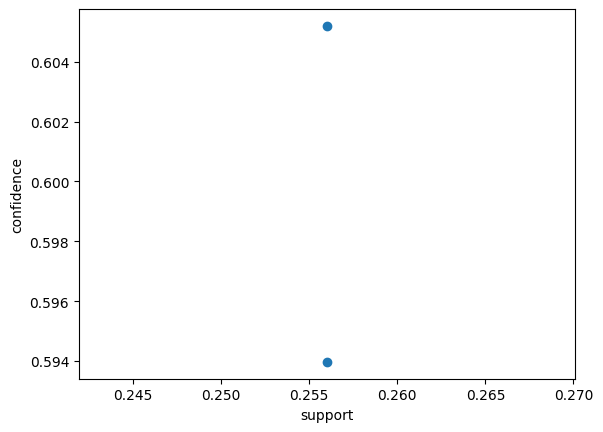

In [12]:
# visualization of obtained rule
plt.scatter(rules1["support"],rules1["confidence"])
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()

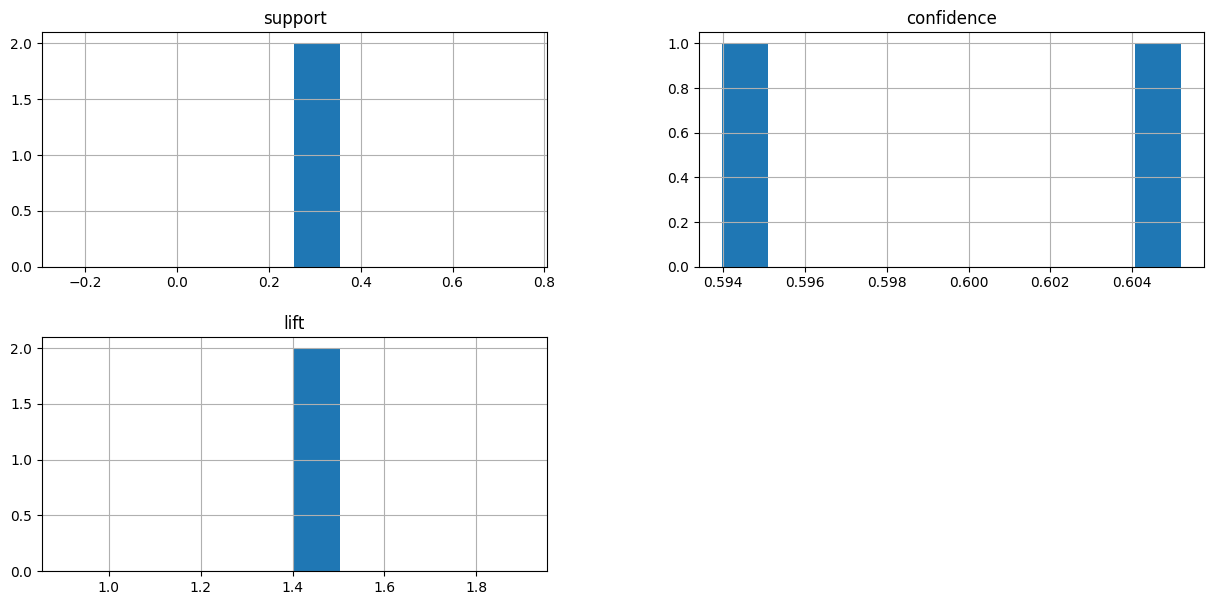

In [13]:
rules1[["support","confidence","lift"]].hist(figsize = (15,7))
plt.show()

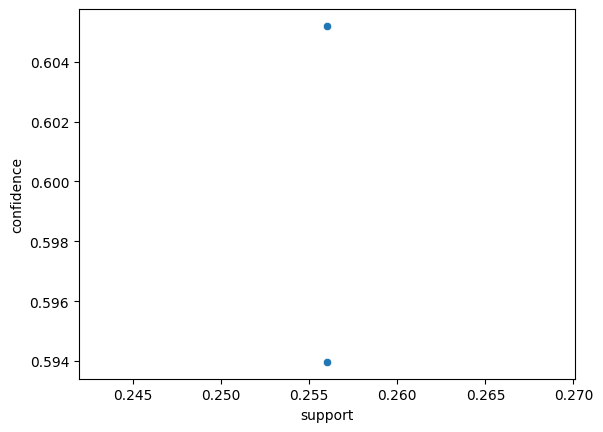

In [14]:
sns.scatterplot(x = rules1["support"], y = rules1["confidence"])
plt.show()

# **2. Association rules with 10% support and 70% confidence**

In [16]:
# with 10% support
frequent_itemset2 = apriori(data, min_support = 0.10, use_colnames = True)
frequent_itemset2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [18]:
# With 70% confidence
rules2 = association_rules(frequent_itemset2, metric = "lift", min_threshold = 0.7)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


In [19]:
rules2.sort_values("lift", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


In [20]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


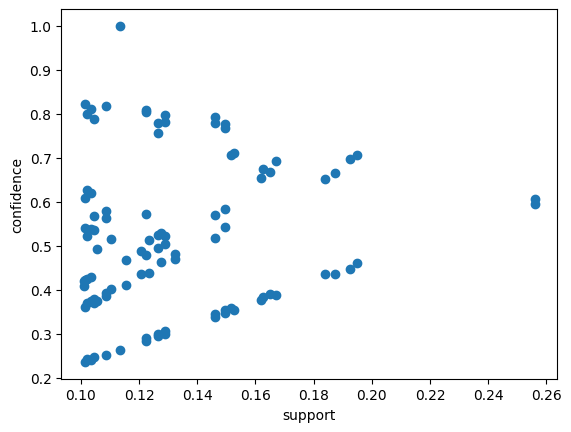

In [21]:
# visualization of obtained rule
plt.scatter(rules2["support"], rules2["confidence"])
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()

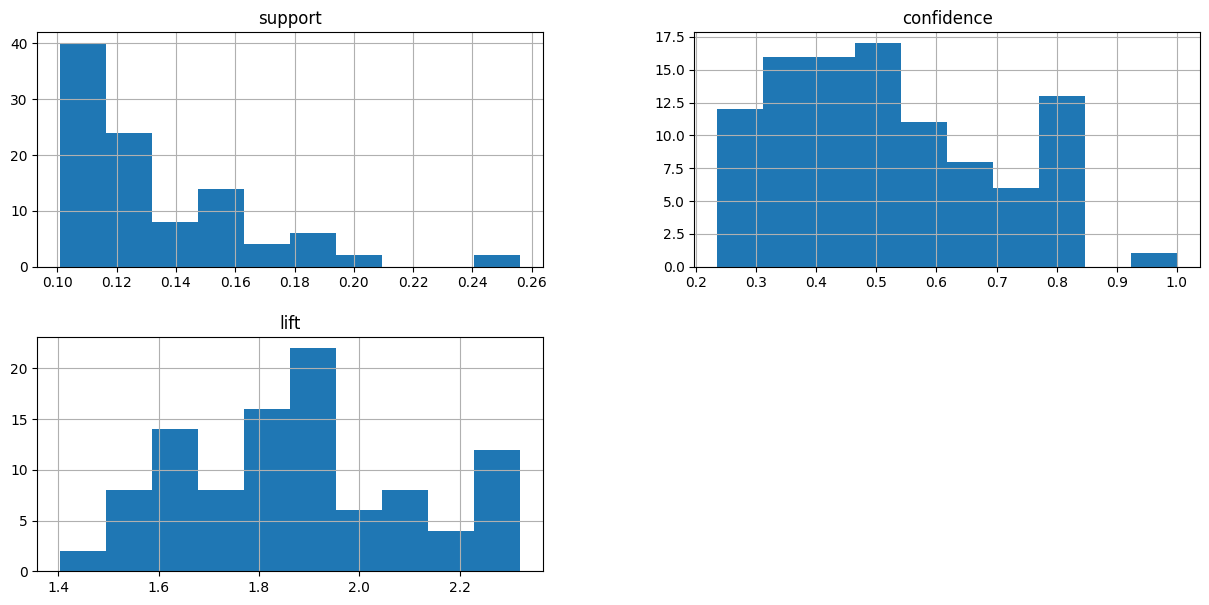

In [22]:
rules2[["support", "confidence", "lift"]].hist(figsize = (15,7))
plt.show()

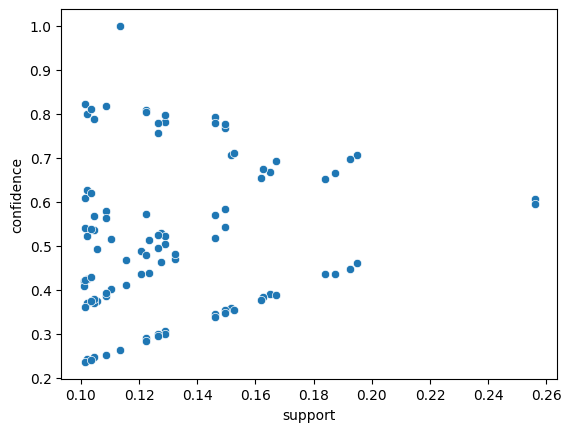

In [23]:
sns.scatterplot(x = rules2["support"], y = rules2["confidence"])
plt.show()

# **3. Association rules with 5% Support and 80% confidence**

In [24]:
# with 5% support
frequent_itemset3 = apriori(data, min_support = 0.05, use_colnames = True)
frequent_itemset3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(GeogBks, CookBks, DoItYBks, YouthBks)"
96,0.0560,"(GeogBks, CookBks, ArtBks, YouthBks)"
97,0.0650,"(ArtBks, CookBks, DoItYBks, GeogBks)"
98,0.0510,"(DoItYBks, GeogBks, ChildBks, CookBks, YouthBks)"


In [25]:
# with 80% confidence
rules3 = association_rules(frequent_itemset3, metric = "lift", min_threshold = 0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(ChildBks, CookBks, ArtBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762
658,(GeogBks),"(ChildBks, CookBks, DoItYBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923
659,(ChildBks),"(ArtBks, CookBks, DoItYBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
660,(CookBks),"(ChildBks, ArtBks, DoItYBks, GeogBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050


In [26]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(ChildBks, CookBks, ArtBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762
658,(GeogBks),"(ChildBks, CookBks, DoItYBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923
659,(ChildBks),"(ArtBks, CookBks, DoItYBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
660,(CookBks),"(ChildBks, ArtBks, DoItYBks, GeogBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050


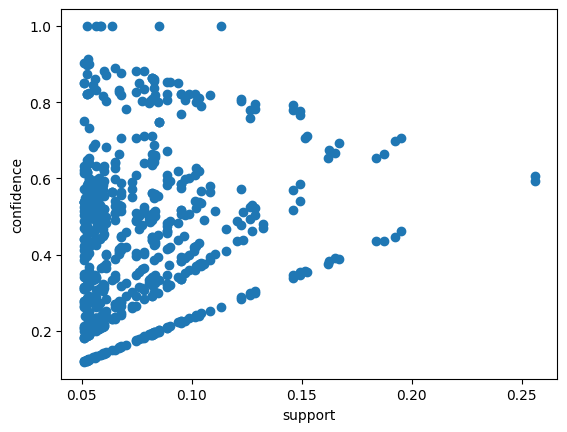

In [27]:
# visualization of obtained rule
plt.scatter(rules3["support"], rules3["confidence"])
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()

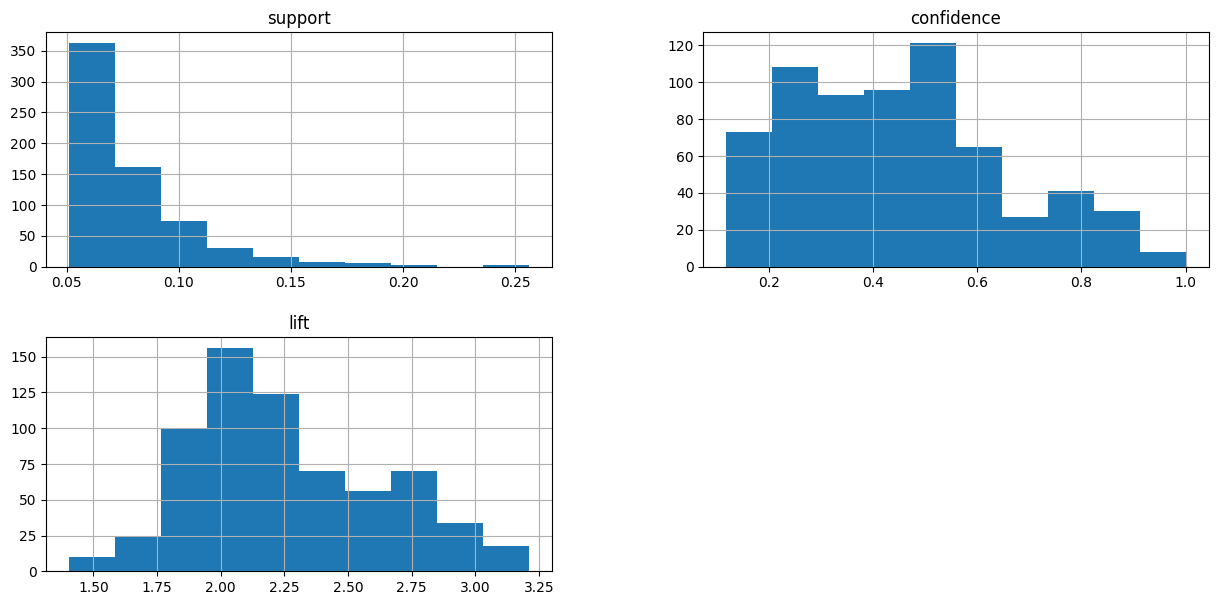

In [28]:
rules3[["support", "confidence", "lift"]].hist(figsize = (15,7))
plt.show()

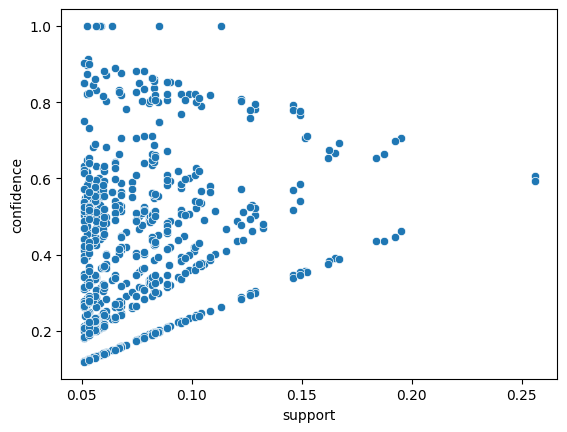

In [29]:
sns.scatterplot(x = rules3["support"], y = rules3["confidence"])
plt.show()

# **Change the minimum length in apriori algorithm**

In [30]:
# Apply the apriori algorithm with a minimum support
min_support = 0.2
frequent_itemsets = apriori(data, min_support = min_support, use_colnames = True)

In [34]:
# Filter the results based on the minimum length
min_length = 2
frequent_itemsets = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) >= min_length)]

# Display the frequent itemsets
print(frequent_itemsets)

   support             itemsets
7    0.256  (ChildBks, CookBks)


In [35]:
# Filter the results based on the minimum length
min_length = 2
frequent_itemset2 = frequent_itemset2[frequent_itemset2["itemsets"].apply(lambda x: len(x) >= min_length)]

# Display the frequent itemsets
print(frequent_itemset2)

    support                       itemsets
9    0.1650           (ChildBks, YouthBks)
10   0.2560            (ChildBks, CookBks)
11   0.1840           (ChildBks, DoItYBks)
12   0.1515             (ChildBks, RefBks)
13   0.1625             (ChildBks, ArtBks)
14   0.1950            (ChildBks, GeogBks)
15   0.1620            (CookBks, YouthBks)
16   0.1155           (DoItYBks, YouthBks)
17   0.1010             (ArtBks, YouthBks)
18   0.1205            (GeogBks, YouthBks)
19   0.1875            (CookBks, DoItYBks)
20   0.1525              (RefBks, CookBks)
21   0.1670              (CookBks, ArtBks)
22   0.1925             (CookBks, GeogBks)
23   0.1135            (CookBks, ItalCook)
24   0.1055             (RefBks, DoItYBks)
25   0.1235             (ArtBks, DoItYBks)
26   0.1325            (DoItYBks, GeogBks)
27   0.1105              (RefBks, GeogBks)
28   0.1275              (ArtBks, GeogBks)
29   0.1290  (ChildBks, CookBks, YouthBks)
30   0.1460  (ChildBks, CookBks, DoItYBks)
31   0.1225

In [36]:
# Filter the results absed on the minimum length
min_length = 2
frequent_itemset3 = frequent_itemset3[frequent_itemset3["itemsets"].apply(lambda x: len(x) >= min_length)]

# Display the frequent itemsets
print(frequent_itemset3)

    support                                          itemsets
9    0.1650                              (ChildBks, YouthBks)
10   0.2560                               (ChildBks, CookBks)
11   0.1840                              (ChildBks, DoItYBks)
12   0.1515                                (ChildBks, RefBks)
13   0.1625                                (ChildBks, ArtBks)
..      ...                                               ...
95   0.0600            (GeogBks, CookBks, DoItYBks, YouthBks)
96   0.0560              (GeogBks, CookBks, ArtBks, YouthBks)
97   0.0650              (ArtBks, CookBks, DoItYBks, GeogBks)
98   0.0510  (DoItYBks, GeogBks, ChildBks, CookBks, YouthBks)
99   0.0535    (DoItYBks, GeogBks, ChildBks, CookBks, ArtBks)

[91 rows x 2 columns]
